In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('bike_sharing.csv')
data.head(2)

,instant,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [4]:
data.shape

(17379, 17)

In [5]:
data.dtypes

instant         int64
date           object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
date          17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
data.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [9]:
data.isnull().sum()

instant       0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# EDA

In [10]:
graph_params = {'legend.fontsize': 'large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}

In [11]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [12]:
plt.rcParams.update(graph_params)

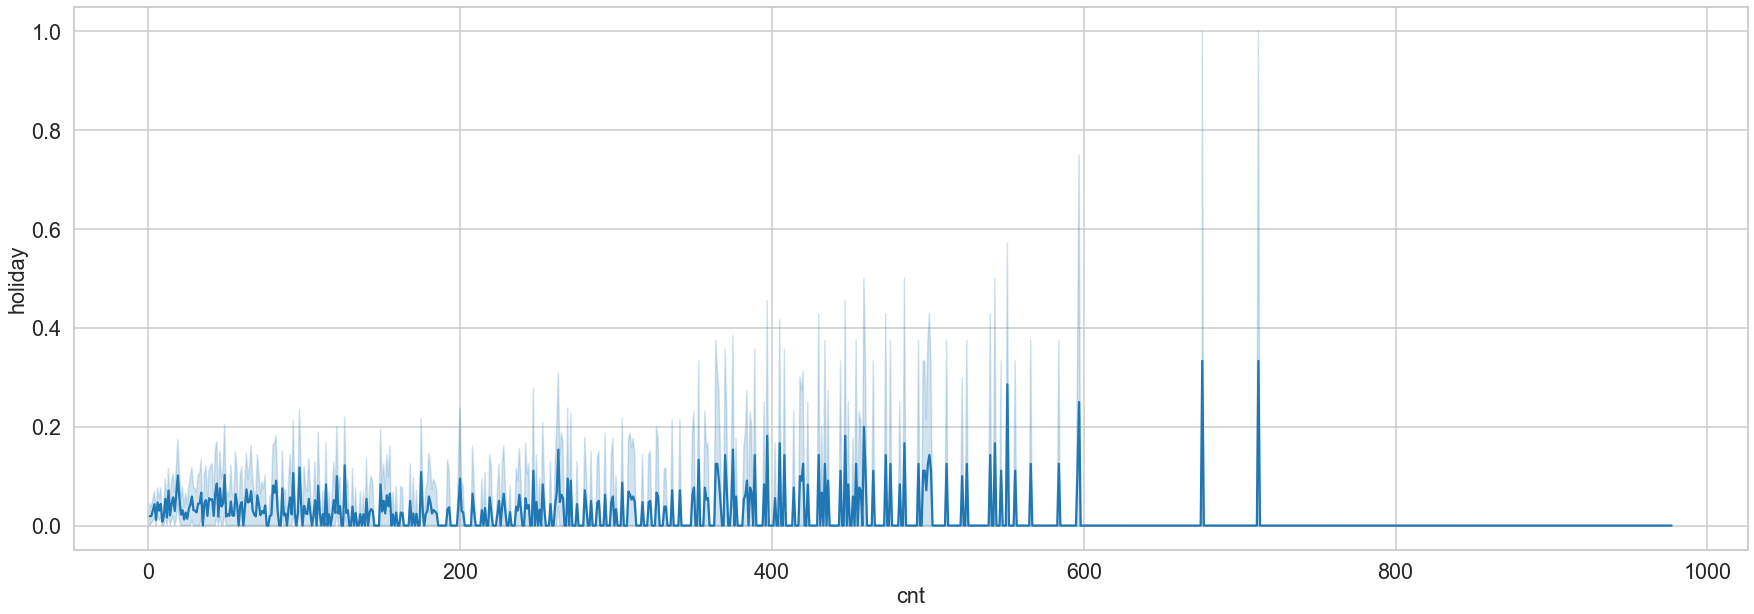

In [13]:
sns.lineplot(x="cnt", y="holiday", data=data)
plt.show()

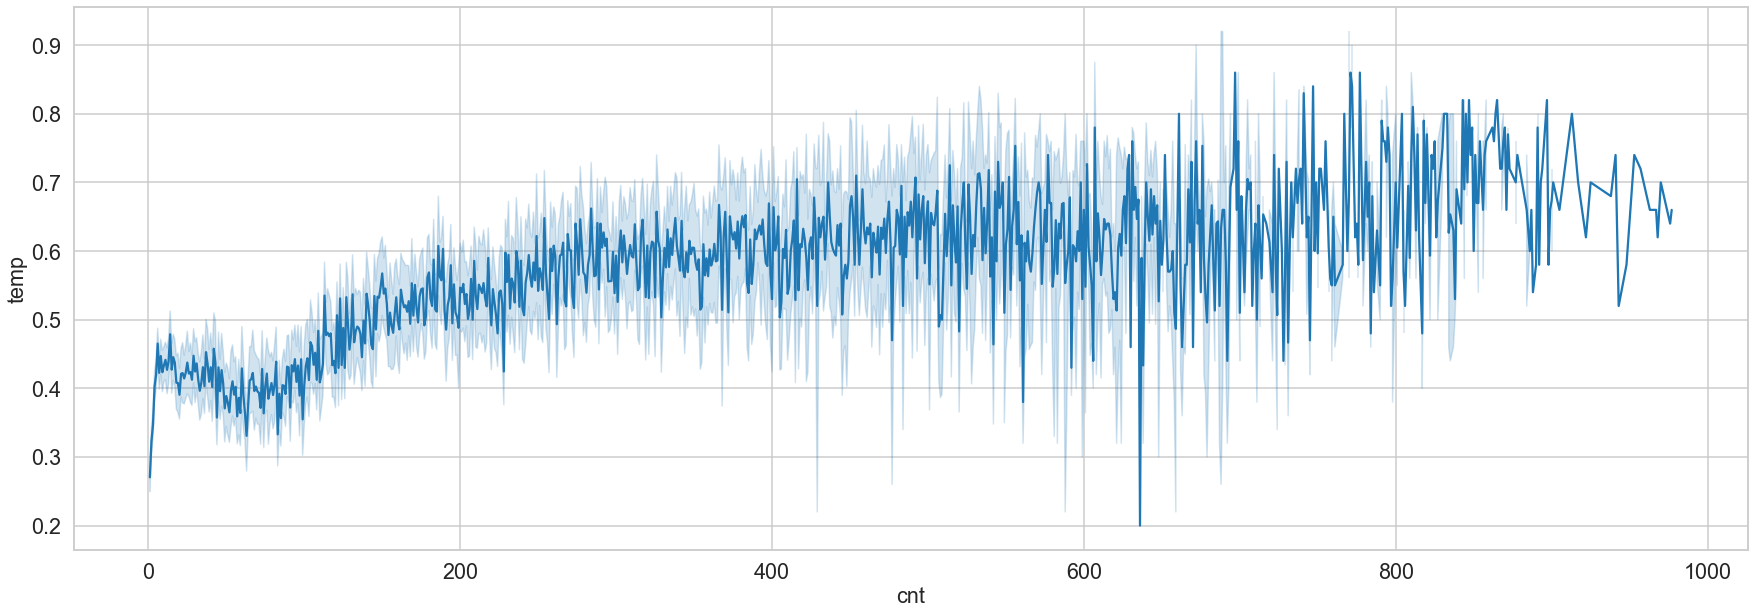

In [14]:
sns.lineplot(x="cnt", y="temp", data=data)
plt.show()

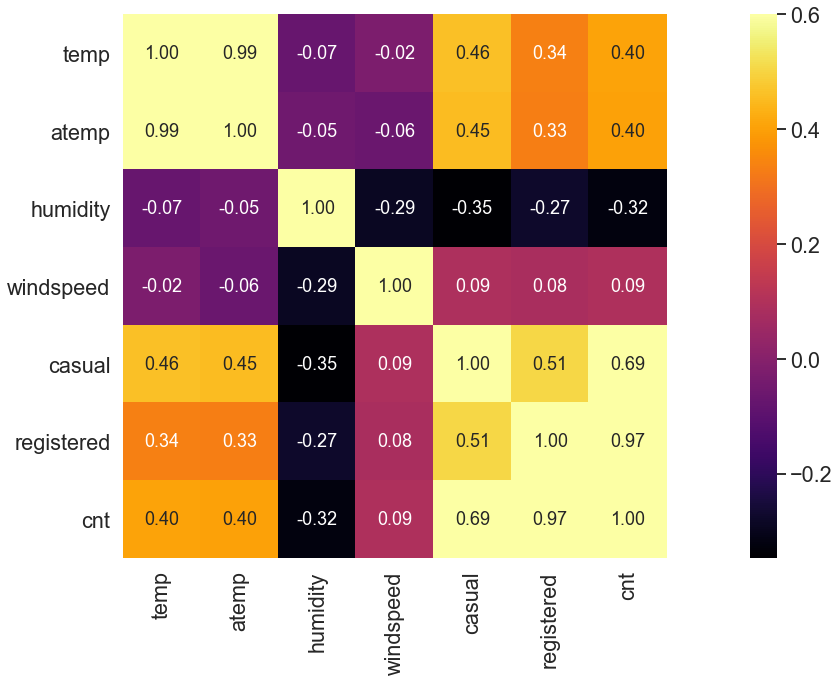

In [18]:
corr = data[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(corr,vmax=.6, cmap='inferno', fmt=".2f", square=True,annot=True)
plt.show()

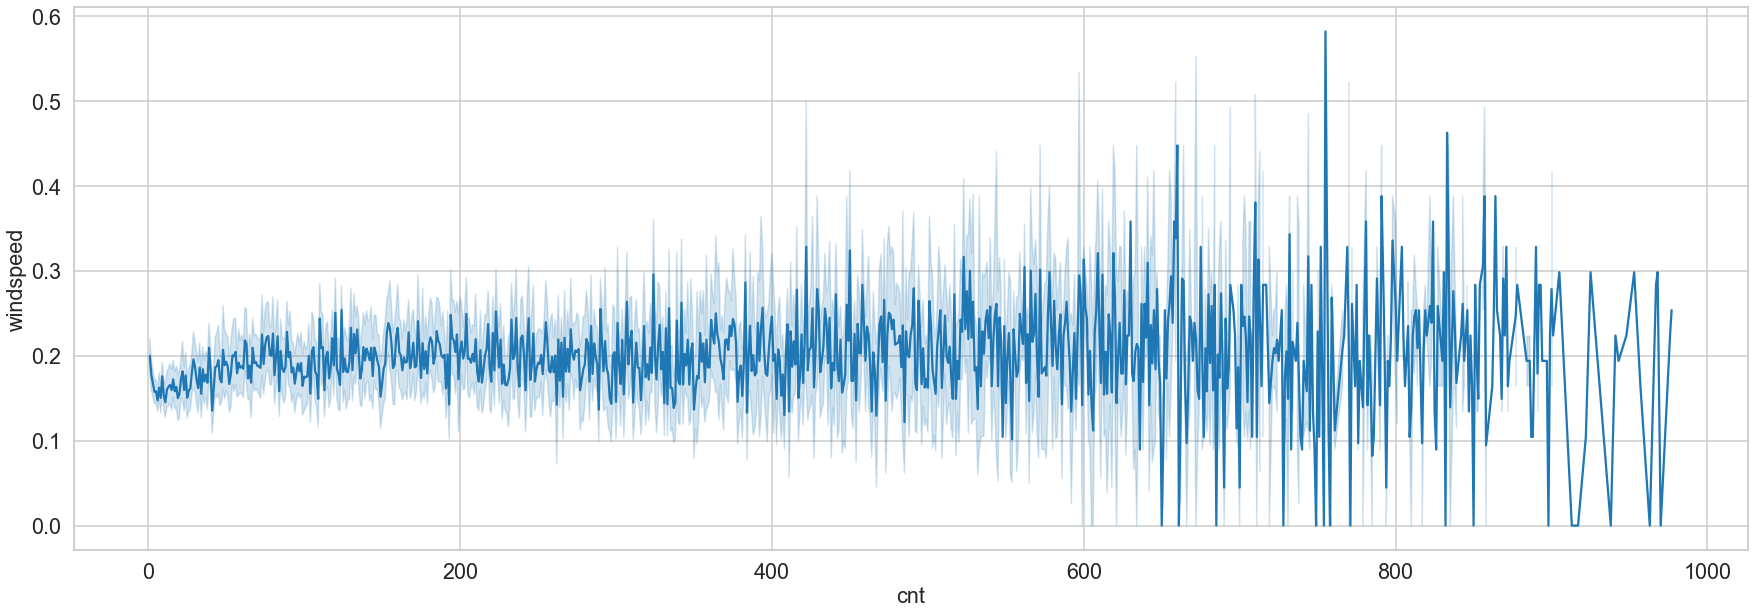

In [19]:
sns.lineplot(x="cnt", y="windspeed", data=data) 
plt.show()

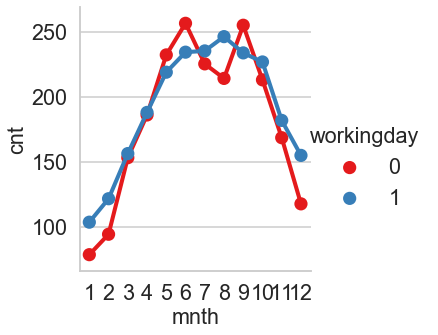

In [20]:
sns.factorplot('mnth','cnt',hue='workingday',data=data, ci=None, palette='Set1')
plt.show()

Text(0.5, 1.0, 'Year distribution of counts')

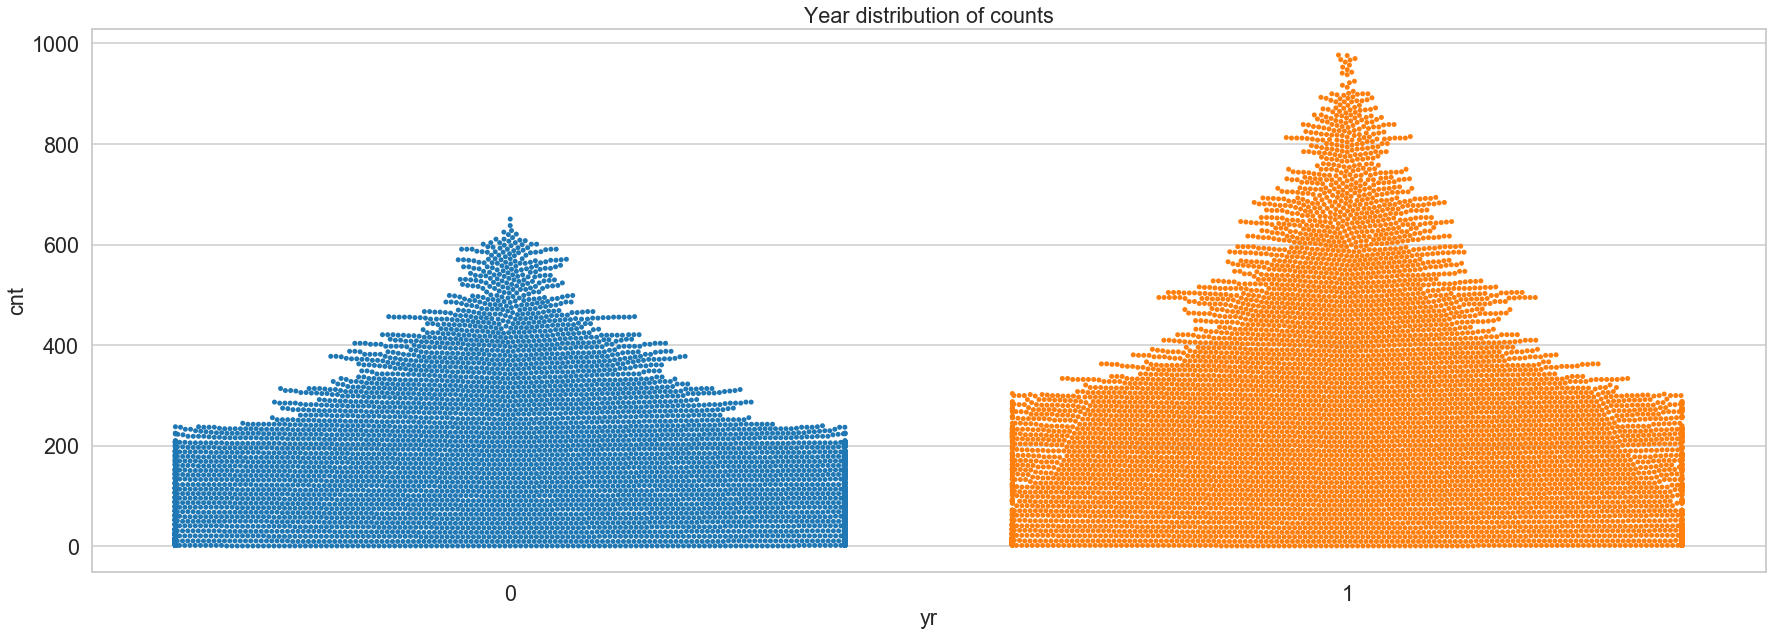

In [21]:
sns.swarmplot(data=data[['yr','cnt']],x='yr',y='cnt')
plt.title("Year distribution of counts") 

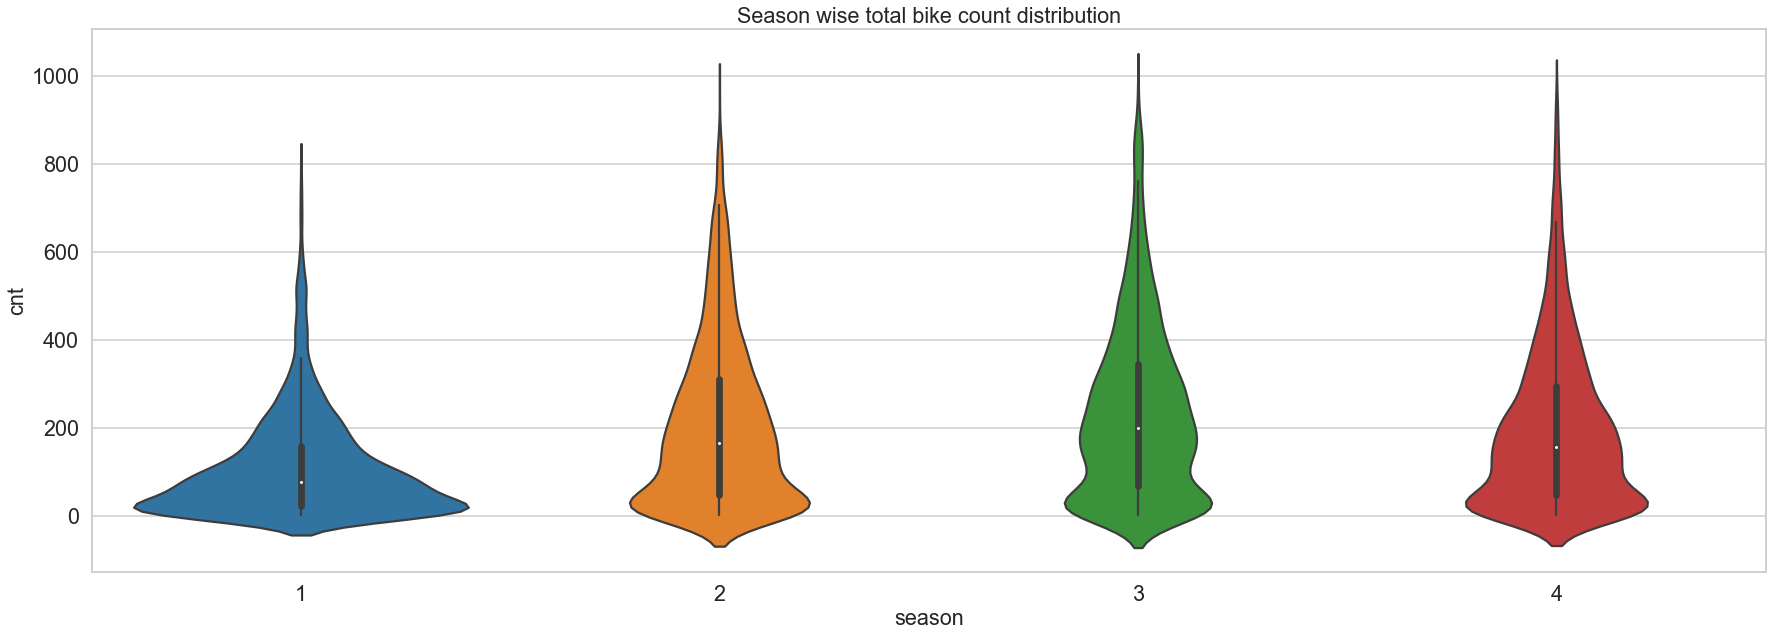

In [22]:
sns.violinplot(data=data[['season','cnt']],x='season',y='cnt')
plt.title('Season wise total bike count distribution')
plt.show()

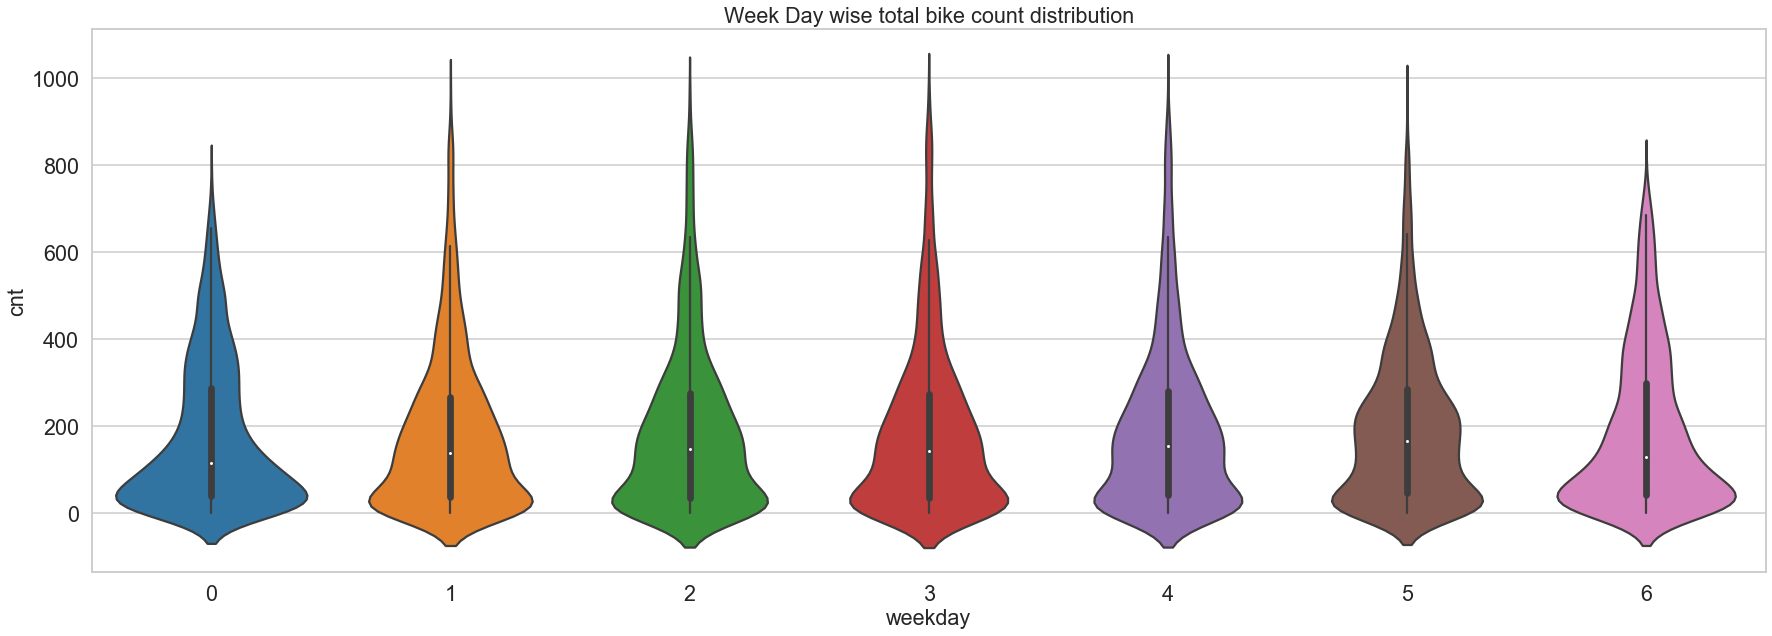

In [23]:
sns.violinplot(data=data[['weekday','cnt']],x='weekday',y='cnt')
plt.title('Week Day wise total bike count distribution')
plt.show()

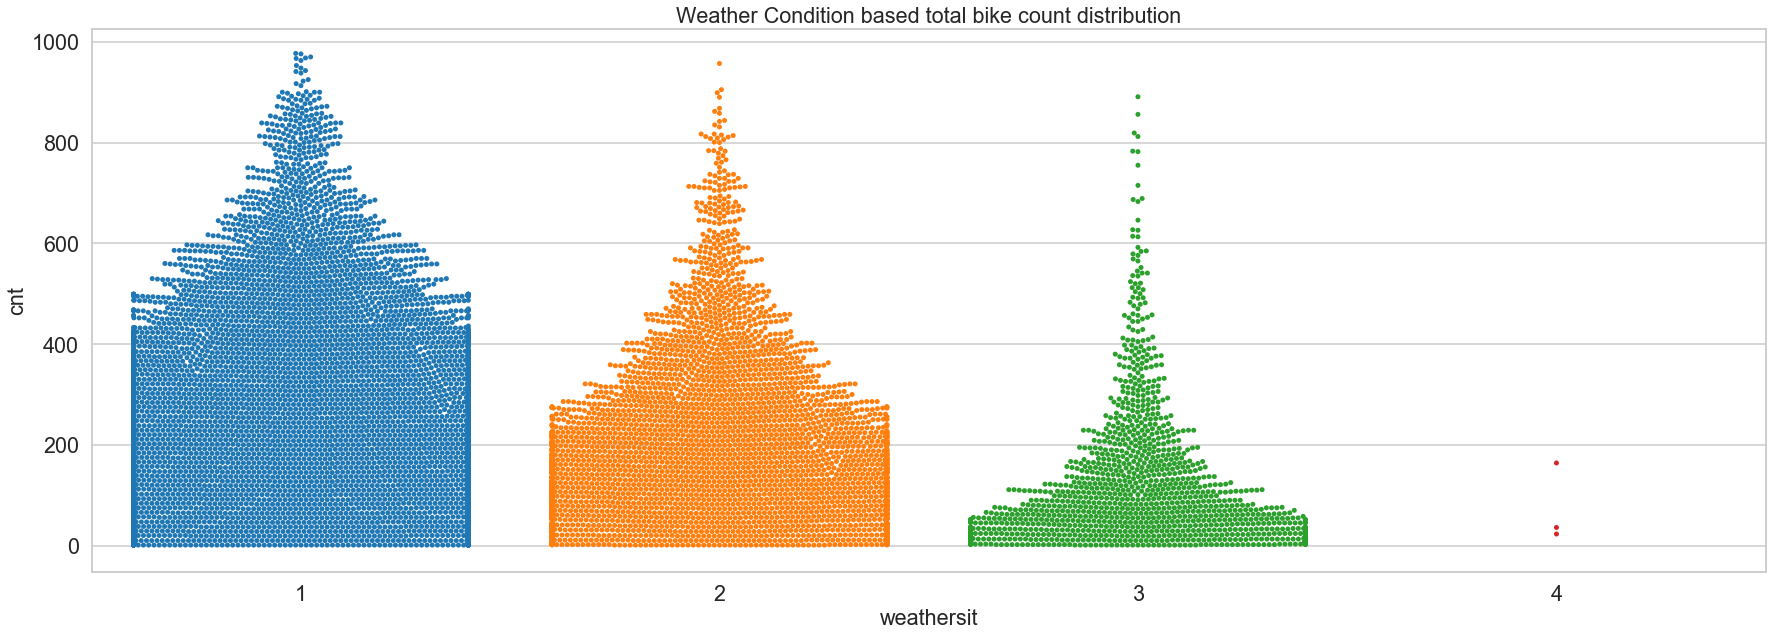

In [27]:
sns.swarmplot(data=data[['weathersit','cnt']],x='weathersit',y='cnt')
plt.title('Weather Condition based total bike count distribution')
plt.show() 

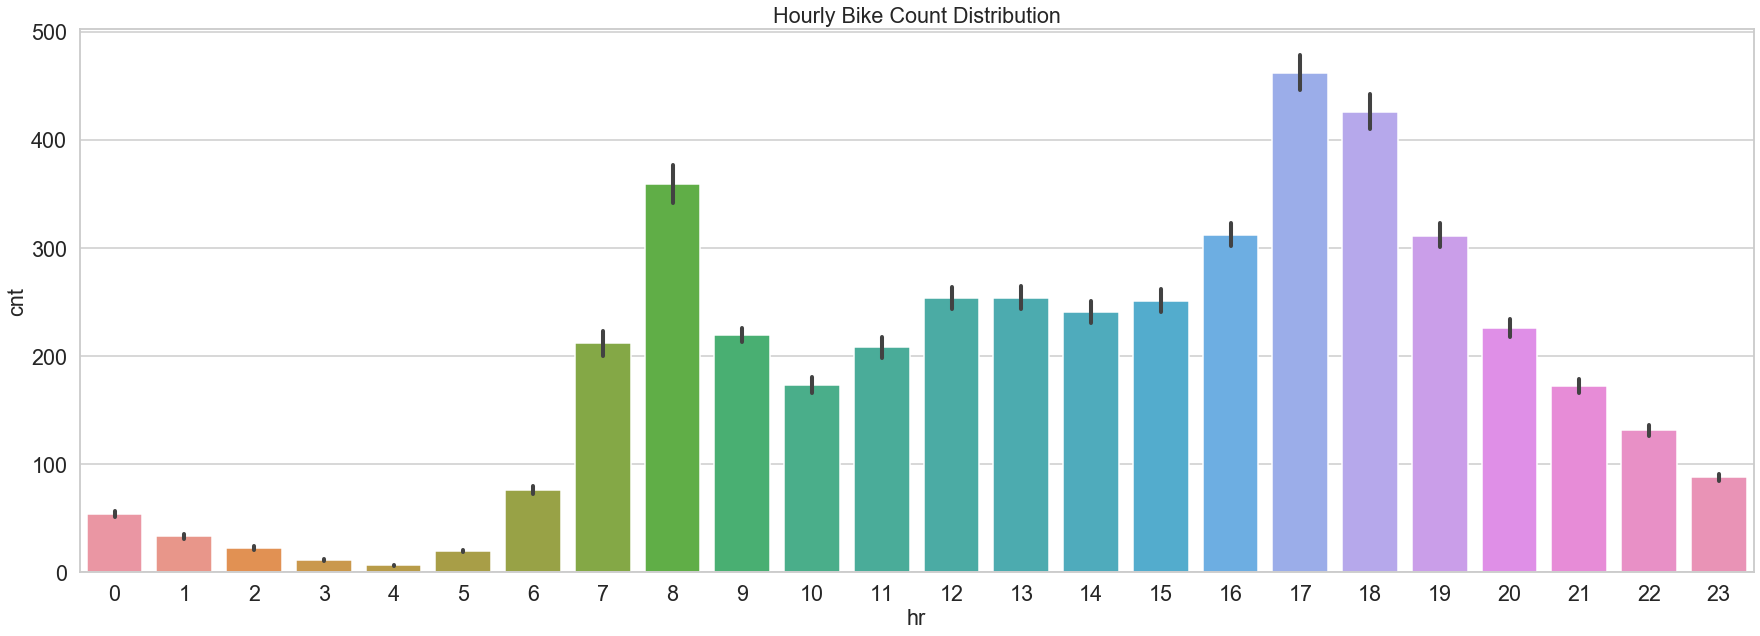

In [28]:
sns.barplot(data=data[['hr','cnt']],x='hr',y='cnt')
plt.title("Hourly Bike Count Distribution")
plt.show()

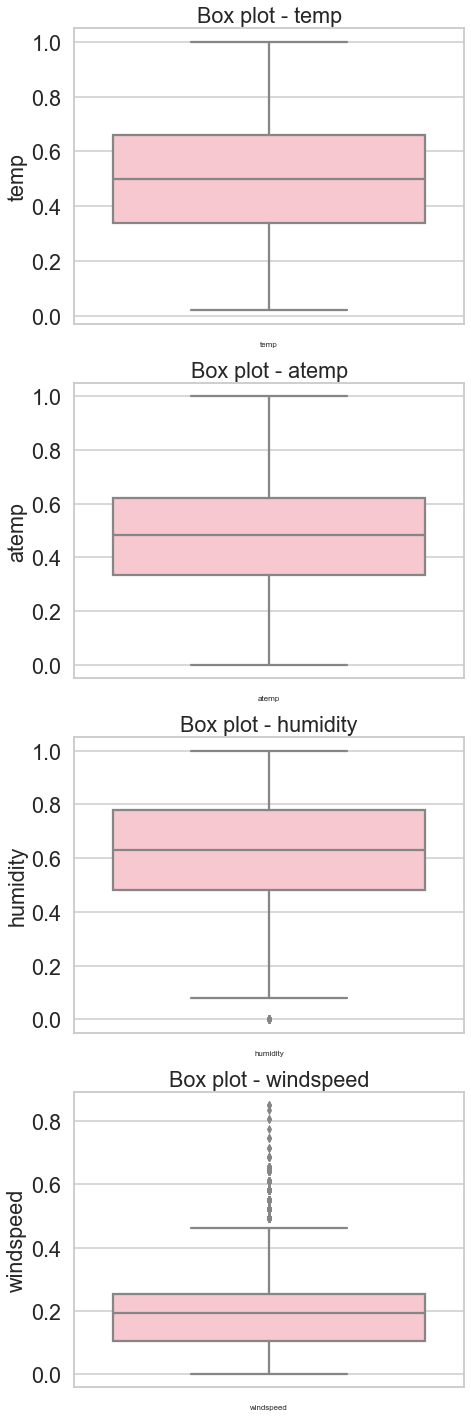

In [30]:
col = ['temp', 'atemp', 'humidity', 'windspeed']
fig, ax = plt.subplots(len(col), figsize=(7,25))

for i, col_val in enumerate(col):

    sns.boxplot(y=data[col_val], ax=ax[i], color='pink')
    ax[i].set_title('Box plot - {}'.format(col_val))
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show() 

In [32]:
df=data.drop(['instant','date','casual','registered', 'weekday'], axis=1)
df.head() 

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,0,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,0,1,0.24,0.2879,0.75,0.0,1


In [34]:
season=pd.get_dummies(df['season'],prefix='season')
data=pd.concat([df,season],axis=1)
df.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,0,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,0,1,0.24,0.2879,0.75,0.0,1


In [35]:
weather=pd.get_dummies(df['weathersit'],prefix='weathersit')
df=pd.concat([df,weather],axis=1)
df.head(10)

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,0,1,0,0,0,1,0.24,0.2879,0.81,0.0000,16,1,0,0,0
1,1,0,1,1,0,0,1,0.22,0.2727,0.80,0.0000,40,1,0,0,0
2,1,0,1,2,0,0,1,0.22,0.2727,0.80,0.0000,32,1,0,0,0
3,1,0,1,3,0,0,1,0.24,0.2879,0.75,0.0000,13,1,0,0,0
4,1,0,1,4,0,0,1,0.24,0.2879,0.75,0.0000,1,1,0,0,0
5,1,0,1,5,0,0,2,0.24,0.2576,0.75,0.0896,1,0,1,0,0
6,1,0,1,6,0,0,1,0.22,0.2727,0.80,0.0000,2,1,0,0,0
7,1,0,1,7,0,0,1,0.20,0.2576,0.86,0.0000,3,1,0,0,0
8,1,0,1,8,0,0,1,0.24,0.2879,0.75,0.0000,8,1,0,0,0
9,1,0,1,9,0,0,1,0.32,0.3485,0.76,0.0000,14,1,0,0,0


In [36]:
x=df.drop(['cnt', 'season', 'weathersit'], axis=1)
y=df['cnt']
print(x.shape)
print(y.shape)

(17379, 13)
(17379,)


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25,random_state=42)

In [38]:
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, roc_curve, auc, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [39]:
SVR=SVR()
RandomForestRegressor=RandomForestRegressor()
DecisionTreeRegressor=DecisionTreeRegressor()
GaussianNB=GaussianNB()
KNeighborsRegressor=KNeighborsRegressor()
AdaBoostRegressor=AdaBoostRegressor()
LinearRegression=LinearRegression()


In [42]:
# Build models
models = []
results = []
Model = []

models.append(('SupportVectorRegressor', SVR))
models.append(('Random Forest', RandomForestRegressor))
models.append(('Decision Tree', DecisionTreeRegressor))
models.append(('GaussianNB', GaussianNB))
models.append(('KNeighbors', KNeighborsRegressor))
models.append(('AdaBoost', AdaBoostRegressor))
models.append(('Logistic Regression', LinearRegression))


for name,model in models:
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('\n')
    
    
    # Model Evaluation
    print('R^2:',metrics.r2_score(y_test, y_pred))
    print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:',metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    
    
    





R^2: 0.5796999440872275
MAE: 70.74494789756223
MSE: 13516.140157079915
RMSE: 116.25893581604777




R^2: 0.921472728571681
MAE: 30.927655104389284
MSE: 2525.304462482615
RMSE: 50.25240752921809




R^2: 0.8706749283642445
MAE: 39.00759493670886
MSE: 4158.875949367089
RMSE: 64.48934756505983




R^2: -4.34403096493787
MAE: 369.14591484464904
MSE: 171855.01288837745
RMSE: 414.553992729991




R^2: 0.8996326103107162
MAE: 35.54135788262371
MSE: 3227.6457905638667
RMSE: 56.81237356917828




R^2: 0.6092079465178992
MAE: 91.70954505125134
MSE: 12567.212620674385
RMSE: 112.10357987448208




R^2: 0.3836028335978089
MAE: 105.62209671813024
MSE: 19822.292137044053
RMSE: 140.7916621716075


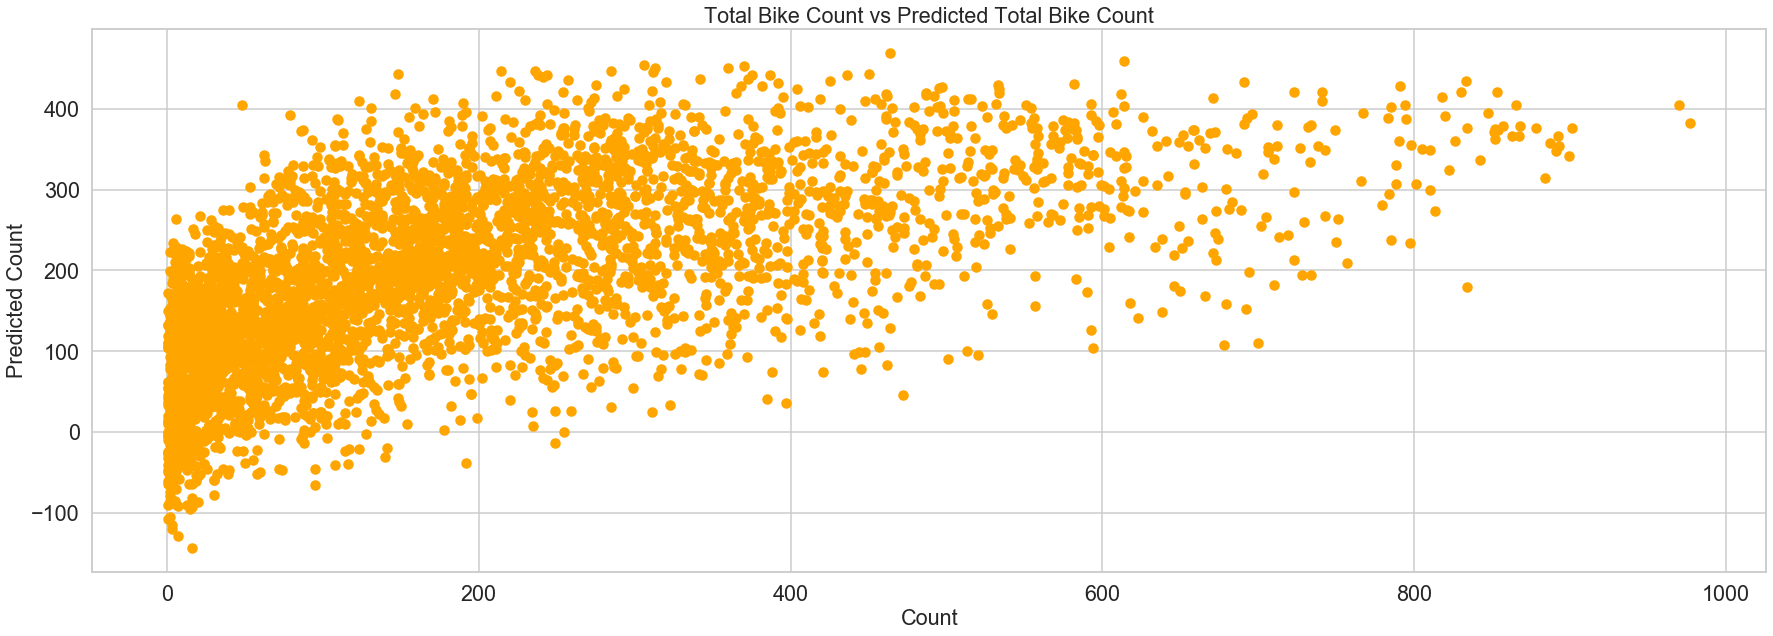

In [43]:

    plt.scatter(y_test, y_pred, color='orange')
    plt.xlabel("Count")
    plt.ylabel("Predicted Count")
    plt.title("Total Bike Count vs Predicted Total Bike Count")
    plt.show()
    

In [45]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "r2").mean()
print("Mean Cross Validation Score of Model:",cv_result)
results.append(cv_result*100)

Mean Cross Validation Score of Model: 0.3848514137785196


In [46]:
from sklearn.externals import joblib    #save the model
joblib.dump(RandomForestRegressor, 'Bike_Count.pkl')

D:\users\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Bike_Count.pkl']